In [1]:
%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
s1 = pd.Series([4,8,12,np.nan,16,18])
s1

0     4.0
1     8.0
2    12.0
3     NaN
4    16.0
5    18.0
dtype: float64

In [3]:
# create a couple more Series
s2, s3 = pd.Series(np.random.randn(6)), pd.Series(np.random.randn(6))

In [4]:
# combine multiple Series into a DataFrame with column labels
df_1 = pd.DataFrame({'A': s1, 'B': s2, 'C': s3})

df_1

,A,B,C
0,4.0,0.701788,-0.903416
1,8.0,-1.251369,0.585752
2,12.0,-1.021358,-0.173495
3,NaN,-1.066067,0.787463
4,16.0,-0.330946,1.392930
5,18.0,-0.616000,-1.099251


In [5]:
# when Series are different lengths, DataFrame fills in gaps with NaN
s4 = pd.Series(np.random.randn(8))  # whoaaaaaa this Series has extra entries!

df1 = pd.DataFrame({'A': s1, 'B': s2, 'C': s3, 'D': s4})

df1 

,A,B,C,D
0,4.0,0.701788,-0.903416,-1.818863
1,8.0,-1.251369,0.585752,-0.070625
2,12.0,-1.021358,-0.173495,1.143043
3,NaN,-1.066067,0.787463,0.265406
4,16.0,-0.330946,1.392930,0.899237
5,18.0,-0.616000,-1.099251,0.180742
6,NaN,NaN,NaN,-0.299811
7,NaN,NaN,NaN,0.378263


In [7]:
# create a DataFrame from numpy array
df2 = pd.DataFrame(np.random.randn(6,4))

df2             # can only have one 'pretty' output per cell (if it's the last command)



,0,1,2,3
0,0.368170,-0.504846,0.411741,-0.913267
1,-0.818208,-2.191893,1.462820,0.286638
2,-1.125452,-1.504479,-0.124714,-0.246721
3,-0.188700,-0.929617,-0.956527,0.726562
4,2.816644,-1.887751,-0.011731,1.112962
5,-0.099229,0.838776,0.193949,0.758607


In [9]:
# recall current dataframe 
df2.head(3)

,0,1,2,3
0,0.368170,-0.504846,0.411741,-0.913267
1,-0.818208,-2.191893,1.462820,0.286638
2,-1.125452,-1.504479,-0.124714,-0.246721


In [13]:
cols = ['a', 'b', 'c', 'd']

# assign columns attribute (names) 
df2.columns = cols

# create an index:
#  generate a sequence of dates with pandas' data_range() method,
#  then assign the index attribute
dates = pd.date_range(start='2013-10-29 16:08:27', freq='W', periods=6)
df2.index = dates

df2

,a,b,c,d
2013-11-03 16:08:27,0.368170,-0.504846,0.411741,-0.913267
2013-11-10 16:08:27,-0.818208,-2.191893,1.462820,0.286638
2013-11-17 16:08:27,-1.125452,-1.504479,-0.124714,-0.246721
2013-11-24 16:08:27,-0.188700,-0.929617,-0.956527,0.726562
2013-12-01 16:08:27,2.816644,-1.887751,-0.011731,1.112962
2013-12-08 16:08:27,-0.099229,0.838776,0.193949,0.758607


In [14]:
print 'what is a date_range object?\n\n', dates

what is a date_range object?

DatetimeIndex(['2013-11-03 16:08:27', '2013-11-10 16:08:27',
               '2013-11-17 16:08:27', '2013-11-24 16:08:27',
               '2013-12-01 16:08:27', '2013-12-08 16:08:27'],
              dtype='datetime64[ns]', freq='W-SUN')


In [15]:
df2.loc['2013-12-01 16:08:27']

a    2.816644
b   -1.887751
c   -0.011731
d    1.112962
Name: 2013-12-01 16:08:27, dtype: float64

In [16]:
df2.loc['2013-11-17 16:08:27','c']

-0.12471392711747202

In [18]:
# new dataframe with random numbers
df1 = pd.DataFrame(np.random.randn(6,4), index=list('abcdef'),columns=list('QRST'))

df1

,Q,R,S,T
a,1.189478,0.607668,-0.374723,-1.956329
b,-0.971801,0.425682,-0.357932,1.128512
c,0.501535,-0.720125,-1.104217,1.344045
d,2.165985,-1.627307,-1.407839,-1.017064
e,-0.888270,-2.194234,-0.935303,0.534844
f,-1.860058,0.951296,-0.380238,1.631714


In [19]:
# address two separate rows, and a range of three columns
df1.loc[['b','e'],'Q':'S']

,Q,R,S
b,-0.971801,0.425682,-0.357932
e,-0.888270,-2.194234,-0.935303


In [20]:
gnacs_x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
colnames = gnacs_x.split('|')

In [21]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, inspect
df1 = pd.read_csv('../data/twitter_sample.csv', sep='|', names=colnames)

df1.tail(7)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
88,"tag:search.twitter.com,2005:351835320297328640",2013-07-01T22:50:51.000Z,@CheniseFowlisX yeah 😂,None,None,None,['en'],en,vi,"[53.28722009, -3.21569687]",Point,"['[-3.400604, 53.072143999999994]', '[-3.40060...",Polygon,"Flintshire, Flintshire",GB,0,Leeds- UK / Greenfield- Wales,None,None,None,None,None,None,None,None,marshaa,marshaleighm,269323425,44,767,486,0,17549,Reply,http://twitter.com/CheniseFowlisX/statuses/351...,None,None
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,#bagdr @limitdemibagdr,None,None,None,None,None,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


In [22]:
# n.b.: this is an *in-place* delete -- unusual for a pandas structure
del df1['None']

# The command below is how the docs suggest carrying this out (creating a new df). 
#   But, it doesn't seem to work -- possibly due to multiple cols with same name. Oh well. 
#new_df = df1.drop('None', axis=1)  # return new df

In [23]:
# have a peek
df1.tail(6)

,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,#bagdr @limitdemibagdr,None,None,None,None,None,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


In [24]:
# inspect those rows with twitter-classified lang 'en' (scroll the right to see)
df1[df1.twitter_lang == 'en'].head()

# the colons in the column name below won't allow dot-access to the column, so we can quote them and still filter.
#df1[df1["gnip:language:value"] == 'en'].head()  

,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
8,"tag:search.twitter.com,2005:351835318028222465",2013-07-01T22:50:51.000Z,@pafcdan Aww good! X,None,None,['en'],en,en,"[50.3582949, -4.0930973]",Point,"['[-4.209496, 50.3320883]', '[-4.209496, 50.44...",Polygon,"Plymouth, Plymouth",GB,0,Plymouth,None,None,None,None,None,None,None,None,Becky ❤,BeckyLou90x,26568635,38,380,860,0,3116,Reply,http://twitter.com/pafcdan/statuses/3518344574...,None,None
9,"tag:search.twitter.com,2005:351835318346981377",2013-07-01T22:50:51.000Z,Newest hobby: sending videos back and forth of...,None,None,['en'],en,en,"[29.54588264, -95.10669141]",Point,"['[-95.145152, 29.506973]', '[-95.145152, 29.5...",Polygon,"Webster, TX",US,None,"Houston, Texas",None,None,None,None,None,None,None,None,lil beyoncé,beezlebrat,541953037,41,160,135,0,4170,Tweet,None,None,None
11,"tag:search.twitter.com,2005:351835318024028161",2013-07-01T22:50:51.000Z,~FINALLY OFF OF WORK~,None,None,['en'],en,en,"[32.86107, -83.72062]",Point,"['[-83.739741, 32.765651]', '[-83.739741, 32.8...",Polygon,"Macon, GA",US,None,None,None,None,None,None,None,None,None,None,Tomeisha Cross,MISSMEISHA223,242505369,18,290,683,0,540,Tweet,None,None,None
12,"tag:search.twitter.com,2005:351835318497980416",2013-07-01T22:50:51.000Z,Rubbing/massaging my feet is like giving me he...,None,None,['en'],en,en,"[33.68890281, -84.27369741]",Point,"['[-85.605165, 30.355756999999997]', '[-85.605...",Polygon,"Georgia, US",US,-18000,Atl...,None,None,None,None,None,None,None,None,Poison †,shanbonita,29619102,64,40543,116,486,60465,Tweet,None,None,None
15,"tag:search.twitter.com,2005:351835318724468737",2013-07-01T22:50:51.000Z,@Hayley_Brownn Same!!!! Very sad times😞😞😞😞,None,None,['en'],en,en,"[54.6884467, -3.51776393]",Point,"['[-3.580063, 54.454108]', '[-3.580063, 54.964...",Polygon,"Allerdale, Cumbria",GB,-36000,None,None,None,None,None,None,None,None,None,Karl Hine,KarlHine,402334657,42,417,259,1,5242,Reply,http://twitter.com/Hayley_Brownn/statuses/3518...,None,None


In [25]:
# create new dataframe from numerical columns
df2 = df1[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount"]]

df2.head()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount
0,35,178,129,0
1,32,144,215,0
2,18,37,54,0
3,50,438,174,1
4,21,12,6,0


In [26]:
df2.dtypes  

gnip:klout_score        object
actor:followersCount     int64
actor:friendsCount       int64
actor:listedCount        int64
dtype: object

In [27]:
# convert ints / strings to floats, give up on anything else (call it 0.0)
def floatify(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)

In [28]:
# assigning to an existing column overwrites that column 
df2['gnip:klout_score'] = df2['gnip:klout_score'].map(floatify)

# check again
df2.dtypes

/bda/app/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


gnip:klout_score        float64
actor:followersCount      int64
actor:friendsCount        int64
actor:listedCount         int64
dtype: object

In [29]:
# use all floats just for fun. 
#  this only works if the elements can all be converted to floats (e.g. ints or something python can handle) 
df2 = df2.astype(float)

df2.dtypes

gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
dtype: object

In [30]:
# look at some activity ratios - add col to df
df2['fol/fr'] = df2['gnip:klout_score'] / df2['actor:followersCount']

df2.head()

# can also use the built-in describe() method to get quick descriptive stats on the dataframe
#df2.describe()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,fol/fr
0,35.0,178.0,129.0,0.0,0.196629
1,32.0,144.0,215.0,0.0,0.222222
2,18.0,37.0,54.0,0.0,0.486486
3,50.0,438.0,174.0,1.0,0.114155
4,21.0,12.0,6.0,0.0,1.750000


In [31]:
# GROUP BY
# back to bigger df, without 'None' cols
df1.head()

,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None


In [32]:
# subset df, create new df with only 'popular' accounts -- those matching the filter condition given
pop_df = df1[df1["actor:followersCount"] >= 100]

# fix the klout scores again
#pop_df['gnip:klout_score'] = pop_df['gnip:klout_score'].map(floatify)

# in case you need to remind yourself of the dataframe
#pop_df.head()

# use GroupBy methods for stats on each group:
#pop_df.groupby("twitter_lang").size()      # number of elements per group
#pop_df.groupby("twitter_lang").sum()       # sum of elements in each group (obviously doesn't make sense for some cols) 
#pop_df.groupby("twitter_lang").mean()      # algebraic mean of elements per group

In [33]:
pop_df.groupby("twitter_lang").size()

twitter_lang
ar      1
en     34
es     14
fr      1
he      1
id      4
it      2
ja      1
ko      1
lv      1
pl      1
pt     10
tr      5
und     2
vi      1
dtype: int64

In [34]:
pop_df.groupby("twitter_lang").mean()

,actor:id,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount
twitter_lang,,,,,
ar,1.438926e+09,458.000000,413.000000,0.000000,1061.000000
en,3.745757e+08,1796.147059,582.735294,16.764706,16364.352941
es,4.486037e+08,1359.285714,441.142857,6.357143,8953.357143
fr,1.270876e+09,116.000000,122.000000,0.000000,3174.000000
he,1.318589e+09,151.000000,284.000000,0.000000,641.000000
id,5.297386e+08,387.000000,245.500000,0.000000,8503.500000
it,5.581492e+08,3541.500000,2047.500000,19.000000,45199.500000
ja,8.132785e+07,152.000000,335.000000,3.000000,2151.000000
ko,1.016681e+09,170.000000,120.000000,0.000000,1094.000000


In [35]:
# though this looks like a normal dataframe, the DataFrameGroupBy object has a heirarchical index
#  this means it may not act as you might expect.
lang_gb = pop_df[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')


# note the new index 'twitter_lang' -- in this case, .head(n) returns <= n elements for each index
lang_gb.head(2)  

# see that they type is DataFrameGroupBy object
#lang_gb

,twitter_lang,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
0,tr,35,178,129,2028
1,es,32,144,215,4071
3,es,50,438,174,17636
5,tr,41,226,346,7759
6,pt,42,247,64,2438
8,en,38,380,860,3116
9,en,41,160,135,4170
16,und,53,1179,628,20141
18,he,37,151,284,641
20,it,46,1999,293,60236


In [36]:
# to get a DataFrame object that responds more like I'm used to, create a new one using the 
#   aggregate method, which results in a single-index DataFrame
lang_gb_mean = lang_gb.aggregate(np.mean)  

lang_gb_mean.head()

# verify the single index
#lang_gb_mean.index

,actor:followersCount,actor:friendsCount,actor:statusesCount
twitter_lang,,,
ar,458.000000,413.000000,1061.000000
en,1796.147059,582.735294,16364.352941
es,1359.285714,441.142857,8953.357143
fr,116.000000,122.000000,3174.000000
he,151.000000,284.000000,641.000000


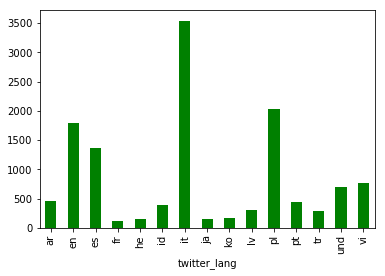

In [37]:
# PART 3 - PLOTTING
# .plot() is a pandas wrapper for matplotlib's plt.plot() 
lang_gb_mean['actor:followersCount'].plot(kind='bar', color='g')

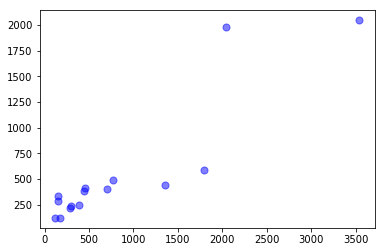

In [38]:
# more base matplotlib 
plt.scatter(x=lang_gb_mean['actor:followersCount'],\
            y=lang_gb_mean['actor:friendsCount'],\
            alpha=0.5,\
            s=50,\
            color='blue',\
            marker='o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc0c269d50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbc0bd6d150>]], dtype=object)

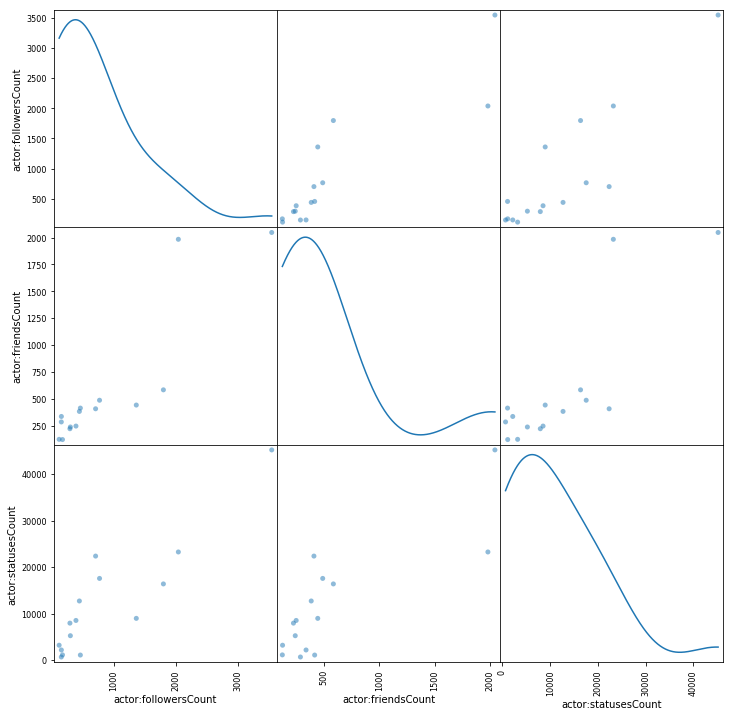

In [39]:
# now read the docs and copypaste a neat-looking plot
from pandas.plotting import scatter_matrix

scatter_matrix(lang_gb_mean, alpha=0.5, figsize=(12,12), diagonal='kde', s=100)

In [40]:
# make up some data with large-scale patterns and a datetime index
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2002', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.head()

,A,B,C,D
2002-01-01,-1.877609,-0.508045,1.064131,-1.178895
2002-01-02,-0.539800,-0.575257,0.391861,-0.733957
2002-01-03,-0.093793,-0.490337,1.764310,-0.134594
2002-01-04,0.907952,-2.299584,1.679330,-1.163290
2002-01-05,-1.135199,-2.280239,1.750266,-0.762288


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc03944c90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbc038c68d0>]], dtype=object)

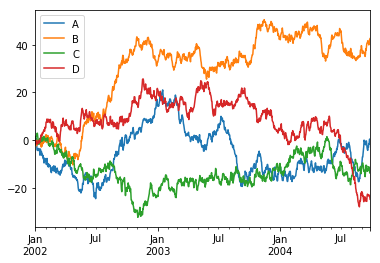

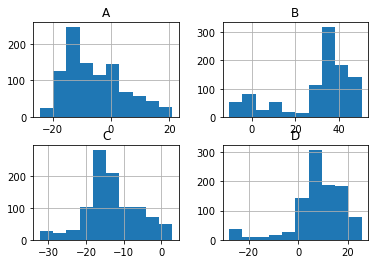

In [41]:
df.plot()
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc03452890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbc03272e90>]], dtype=object)

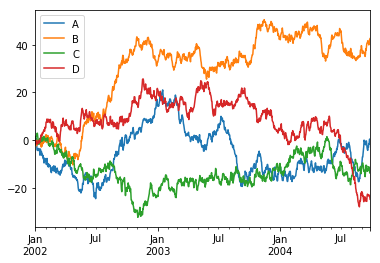

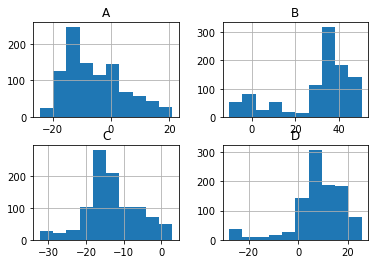

In [42]:
import prettyplotlib

df.plot()
df.hist()

In [43]:
# VISUALIZING THE DISTRIBUTION OF A DATASET
%matplotlib inline

In [44]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [45]:
import seaborn as sns
sns.set(color_codes=True)

In [46]:
np.random.seed(sum(map(ord, "distributions")))

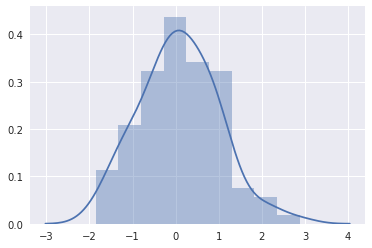

In [47]:
# UNIVARIATE
x = np.random.normal(size=100)
sns.distplot(x);

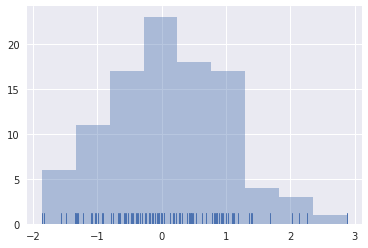

In [48]:
sns.distplot(x, kde=False, rug=True);

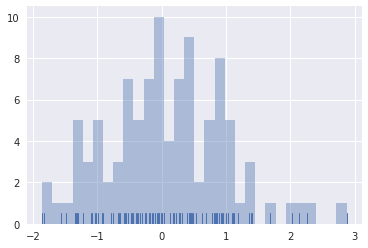

In [49]:
sns.distplot(x, bins=30, kde=False, rug=True);

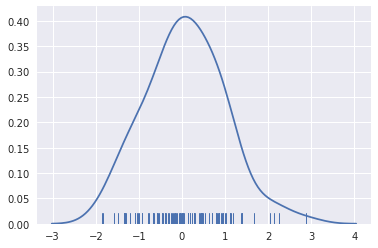

In [50]:
sns.distplot(x, hist=False, rug=True);

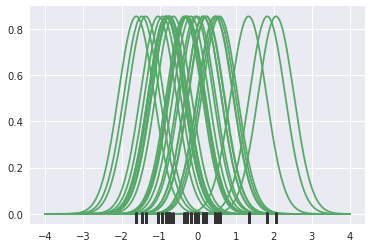

In [52]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="g")

sns.rugplot(x, color=".2", linewidth=3);

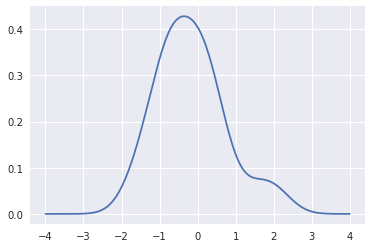

In [53]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

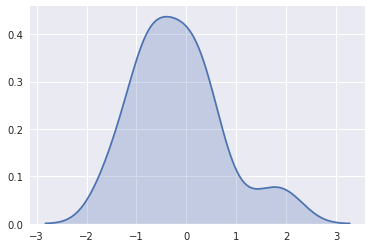

In [54]:
sns.kdeplot(x, shade=True);

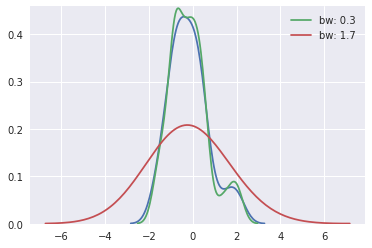

In [55]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.3, label="bw: 0.3")
sns.kdeplot(x, bw=1.7, label="bw: 1.7")
plt.legend();

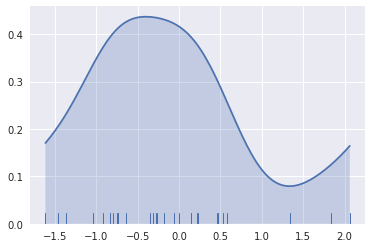

In [56]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

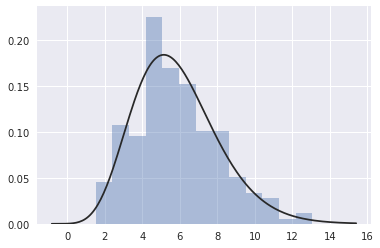

In [57]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

In [58]:

# PLOTTING BIVARIATE...scatterplot...jointplot
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

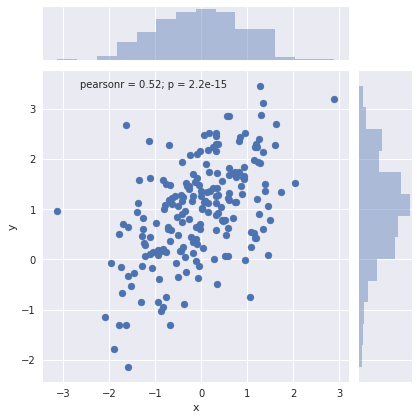

In [59]:
sns.jointplot(x="x", y="y", data=df);

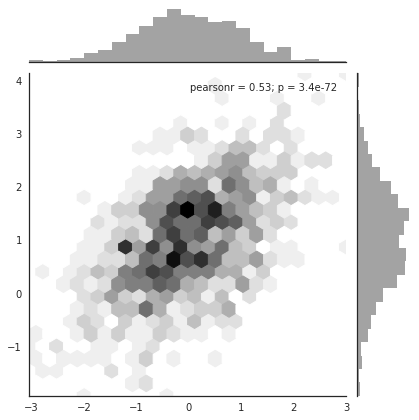

In [60]:
# HEXBIN PLOT
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

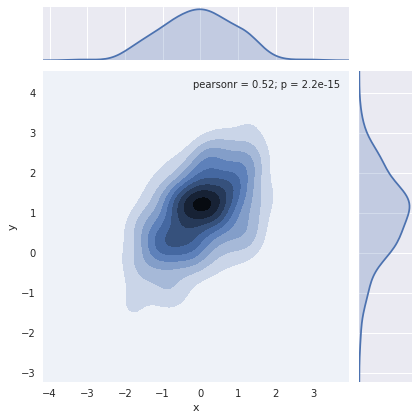

In [61]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

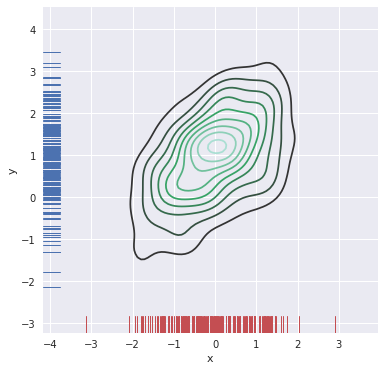

In [63]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="r", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

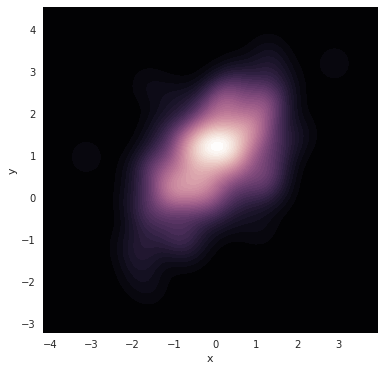

In [64]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

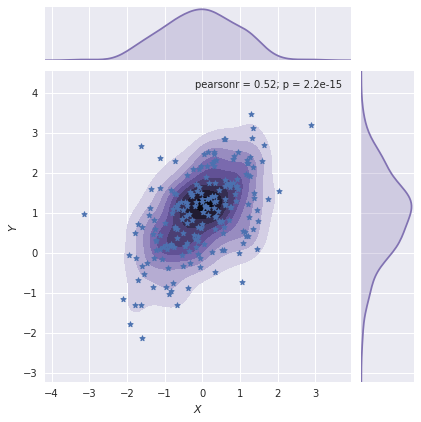

In [65]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="*")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

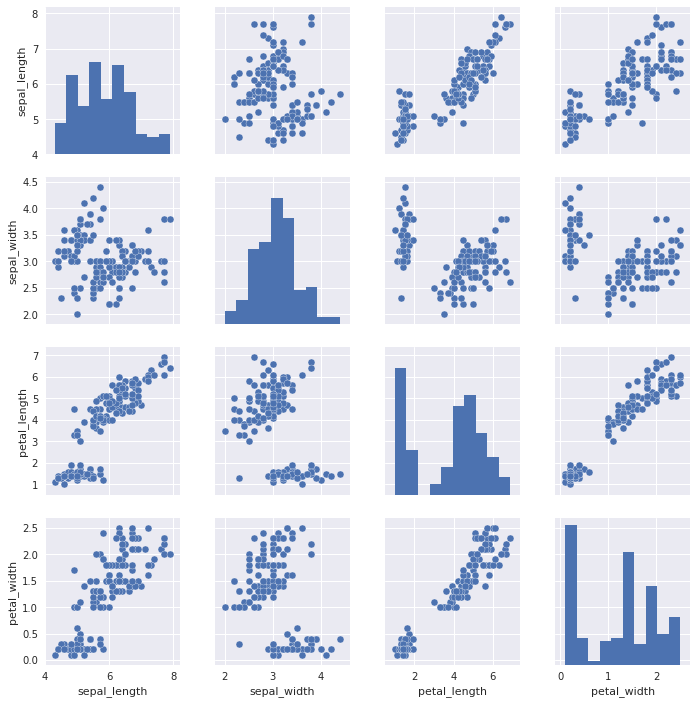

In [66]:
# pairwise dataset....pairplot
iris = sns.load_dataset("iris")
sns.pairplot(iris);

/bda/app/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


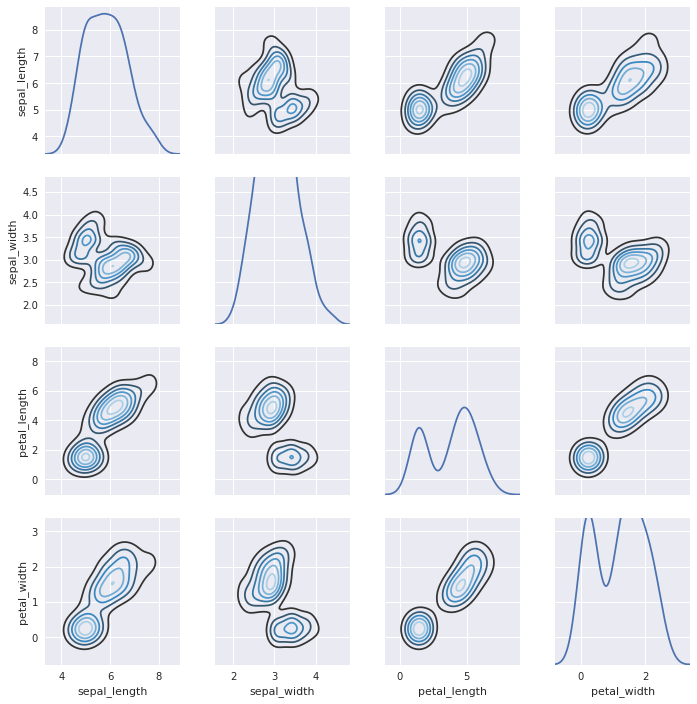

In [67]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

In [68]:
# VISUALIZING LINEAR RELATIONSHIPS
%matplotlib inline

In [69]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [70]:
import seaborn as sns
sns.set(color_codes=True)

In [71]:
np.random.seed(sum(map(ord, "regression")))

In [72]:
tips = sns.load_dataset("tips")

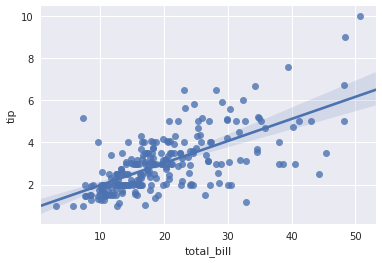

In [73]:
# REGPLOT regression
sns.regplot(x="total_bill", y="tip", data=tips);

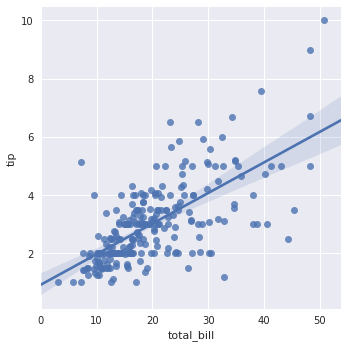

In [74]:
# LMPLOT
sns.lmplot(x="total_bill", y="tip", data=tips);

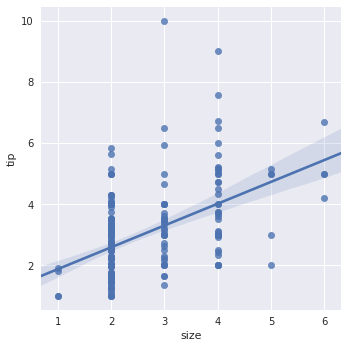

In [76]:
sns.lmplot(x="size", y="tip", data=tips);

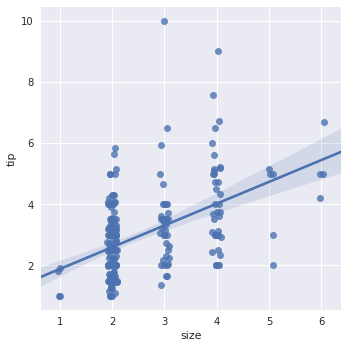

In [78]:
# use JITTER to make data points more clear
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.09);

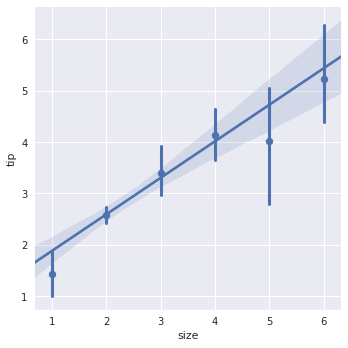

In [79]:
# plot estimate of central tendency with conf. interval
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

In [80]:
anscombe = sns.load_dataset("anscombe")

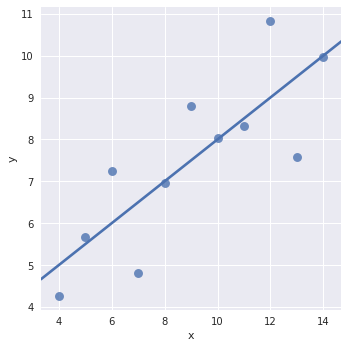

In [82]:
# ANSCOMBE I
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

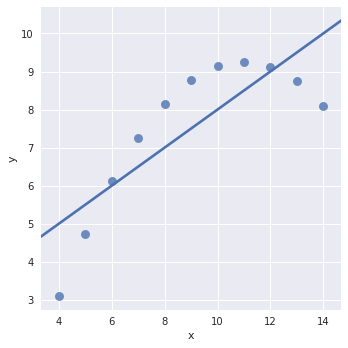

In [83]:
# ANSCOMBE II
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

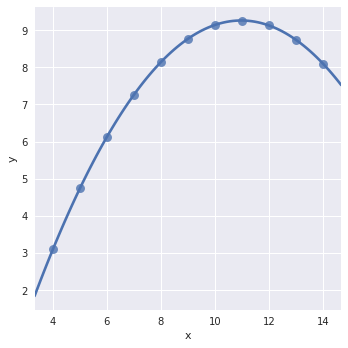

In [84]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

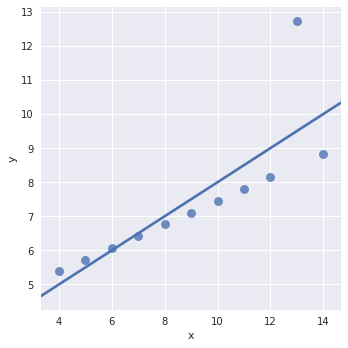

In [85]:
# ANSCOMBE III
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

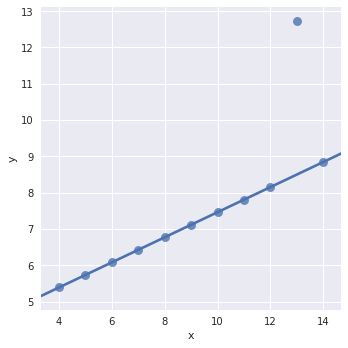

In [86]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

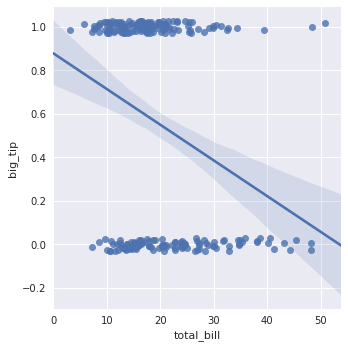

In [87]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

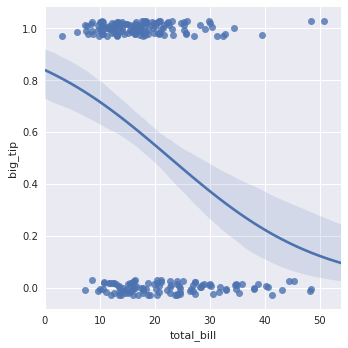

In [88]:
# fit a LOGISTIC REGRESSION
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

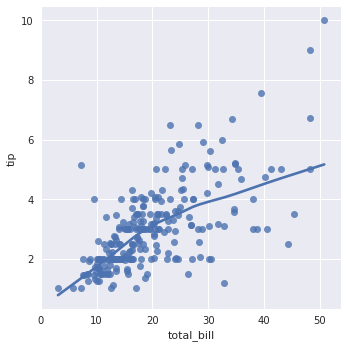

In [89]:
# non parametric using a lowess smoother
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

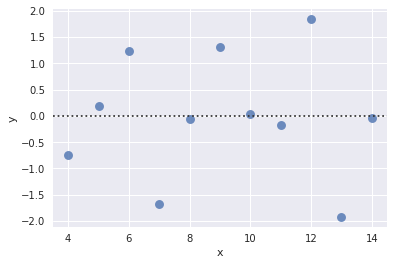

In [90]:
# RESIDPLOT - check whether simple regression looks appropriate
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

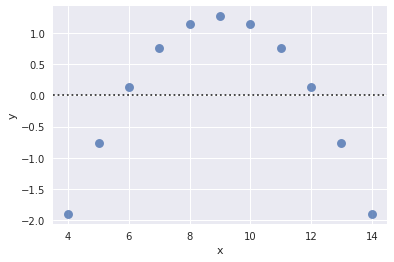

In [91]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

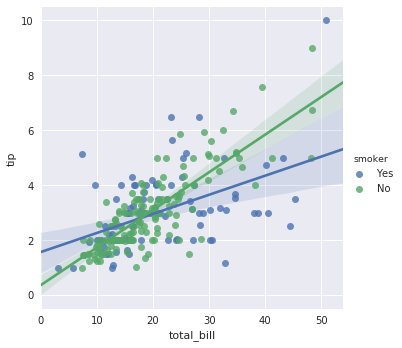

In [92]:
# Conditioning on Other Variables with HUE - COLOR - etc
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

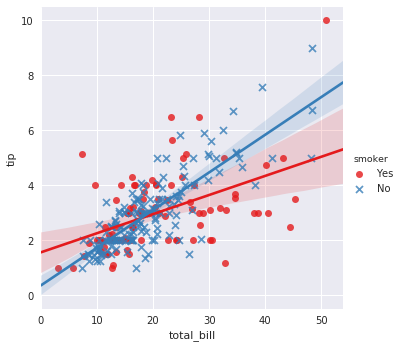

In [93]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

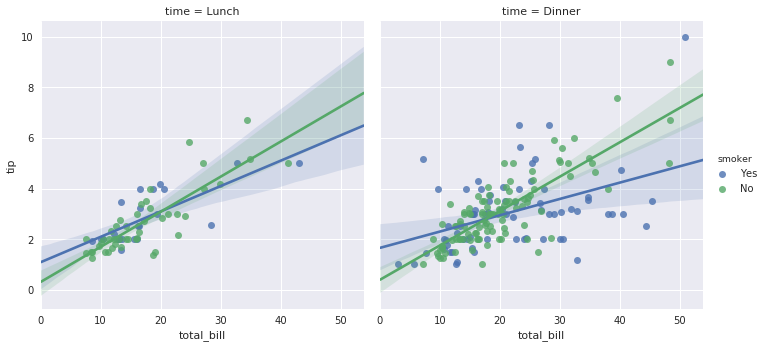

In [94]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

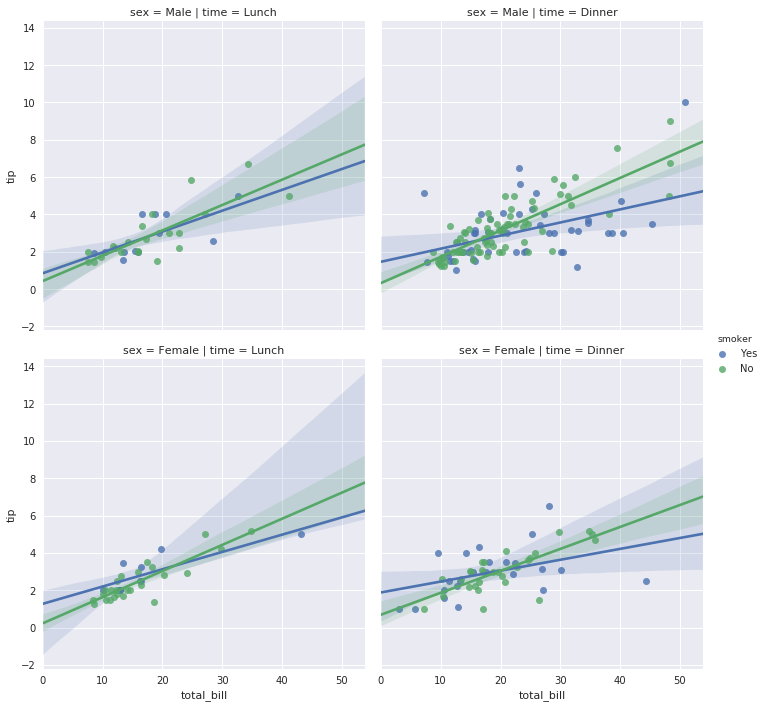

In [95]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

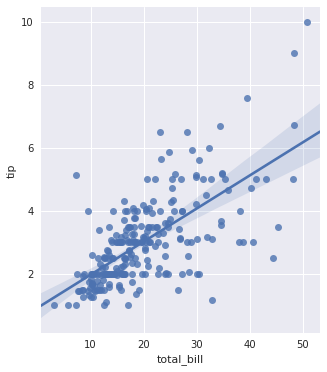

In [96]:
# CONTROL SIZE AND SHAPE OF PLOT - you need to create a figure object yourself
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

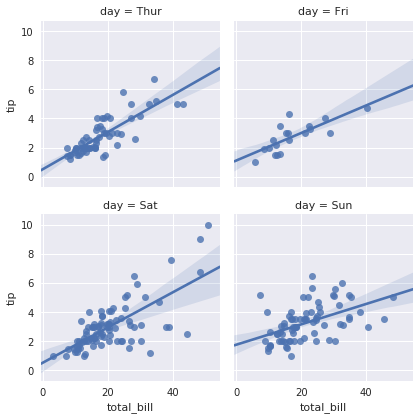

In [97]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

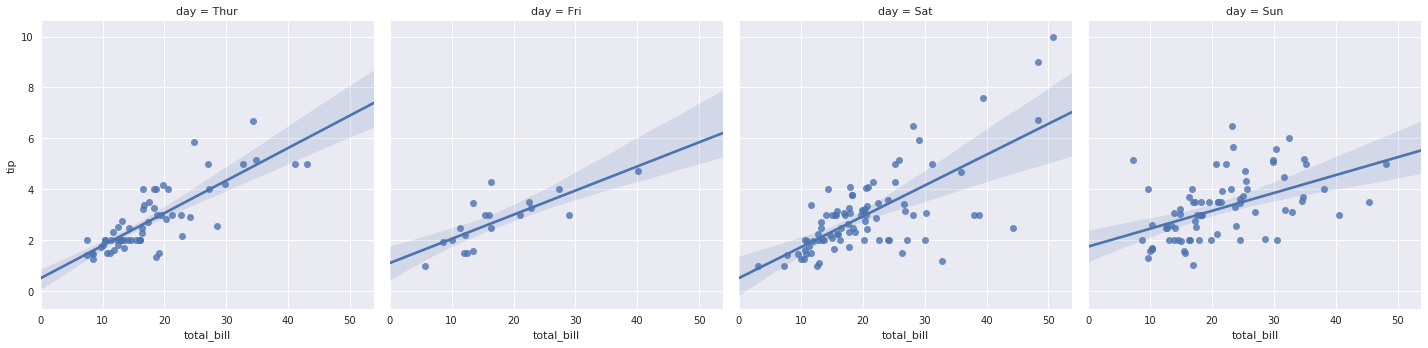

In [98]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=4, size=5);

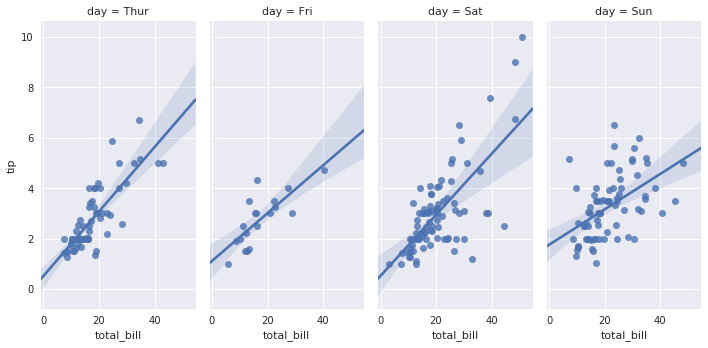

In [99]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

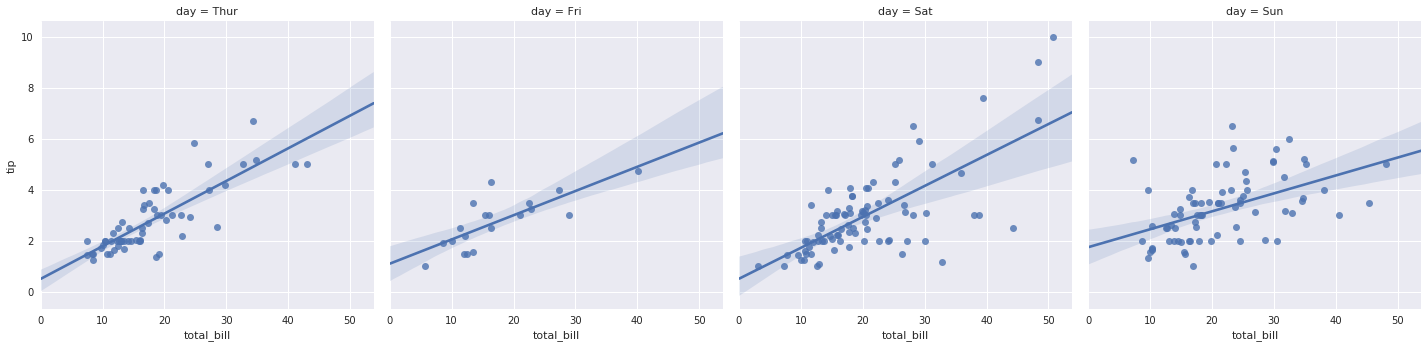

In [100]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=1);

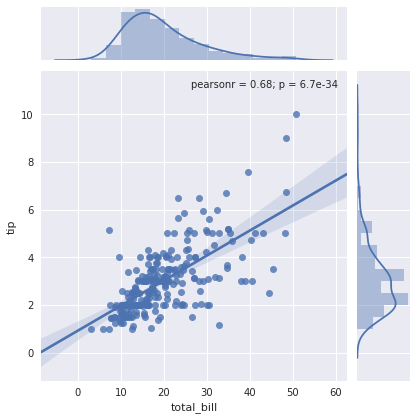

In [101]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

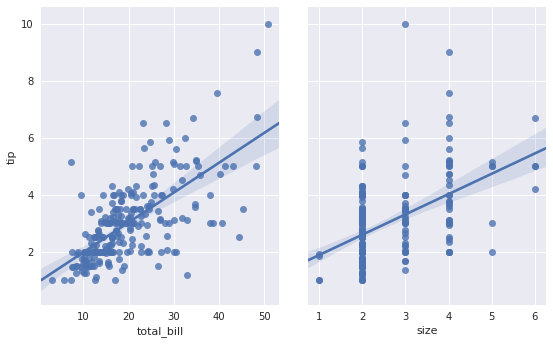

In [102]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

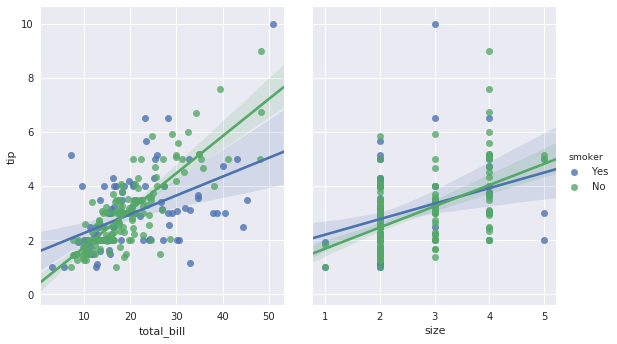

In [103]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");

In [105]:
# PLOTTING WITH CATEGORICAL DATA
%matplotlib inline

In [106]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [107]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [108]:
np.random.seed(sum(map(ord, "categorical")))

In [109]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

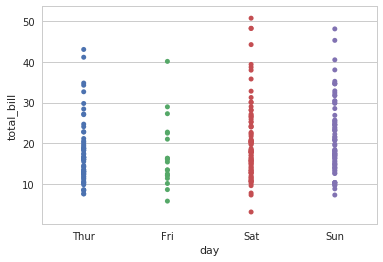

In [110]:
# Using STRIPPLOT
sns.stripplot(x="day", y="total_bill", data=tips);

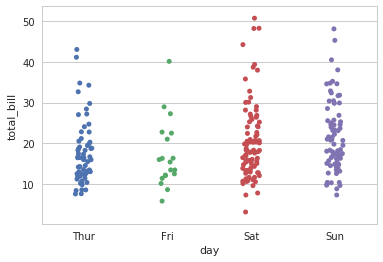

In [111]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

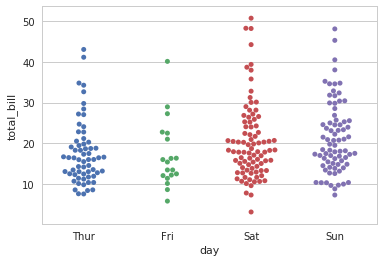

In [112]:
# SWARMPLOT - uses algorithm to avoid overlapping points
sns.swarmplot(x="day", y="total_bill", data=tips);

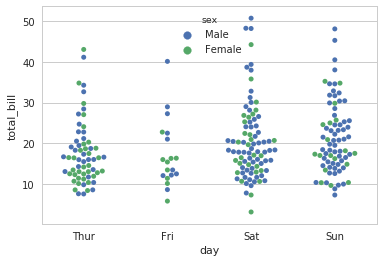

In [113]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

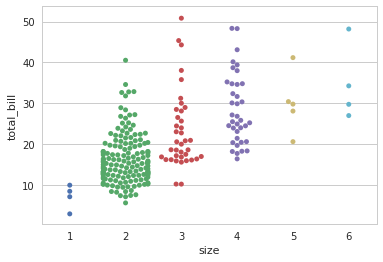

In [114]:
sns.swarmplot(x="size", y="total_bill", data=tips);

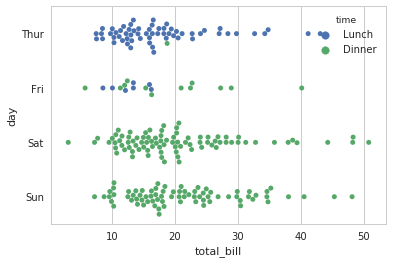

In [115]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

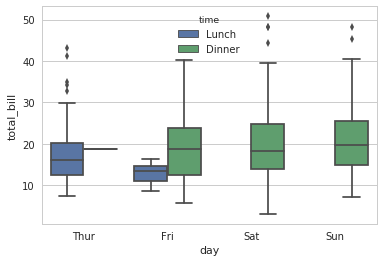

In [116]:
# DISTRIBUTIONS OF OBSERVATIONS WITHIN CATEGORIES
# BOXPLOTS
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

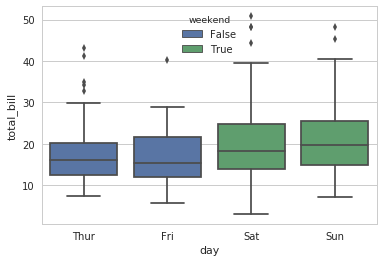

In [117]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False);

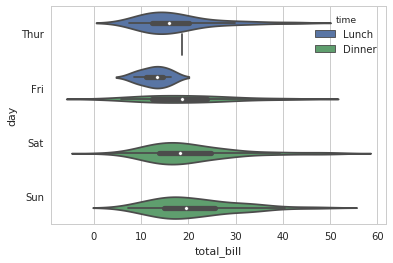

In [118]:
# violinplots
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

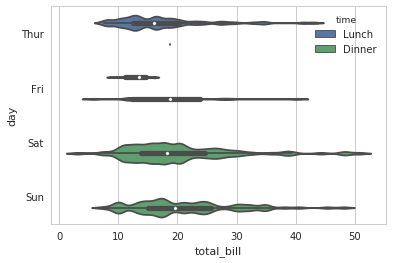

In [119]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

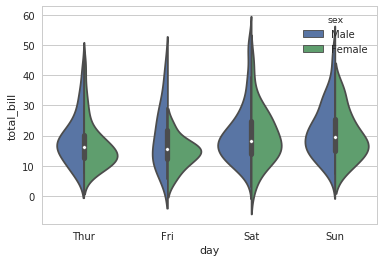

In [120]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

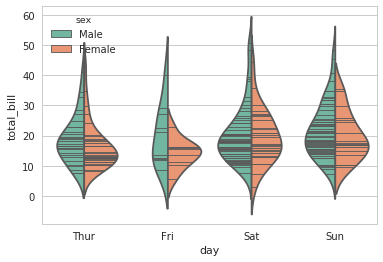

In [122]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set2");

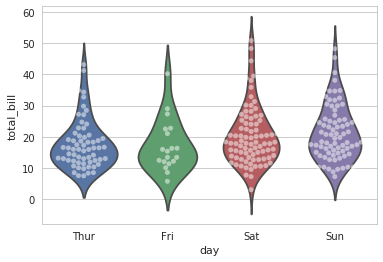

In [123]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

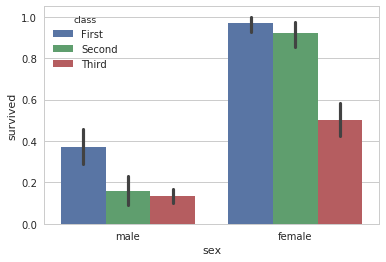

In [124]:
# STATISTICAL ESTIMATION WITHIN CATEGORIES
# BARPLOTS
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

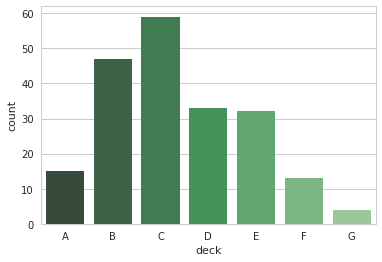

In [125]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

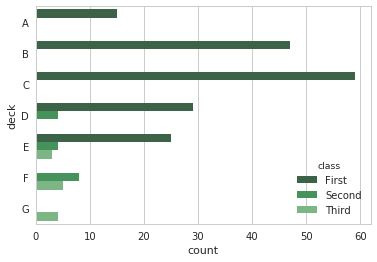

In [126]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

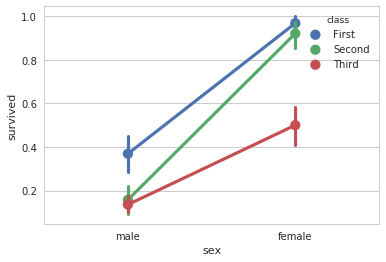

In [127]:
# POINTPLOTS
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

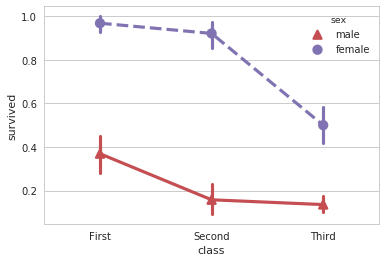

In [129]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "r", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

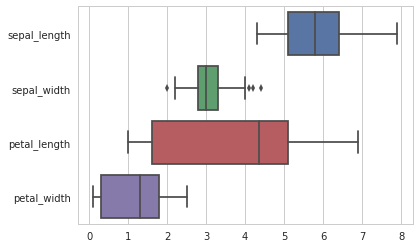

In [130]:
# WIDEFORM DATA
sns.boxplot(data=iris, orient="h");

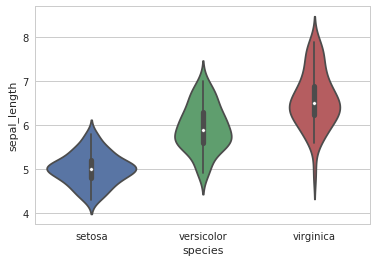

In [131]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

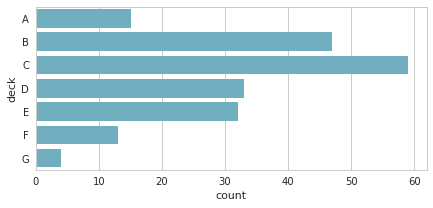

In [132]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

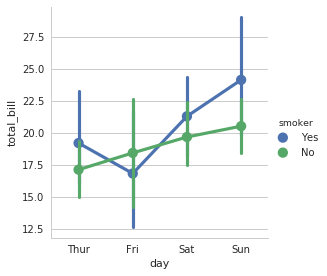

In [133]:
# DRAWING MULTI-PANEL CATEGORICAL PLOTS
# FACTORPLOT
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

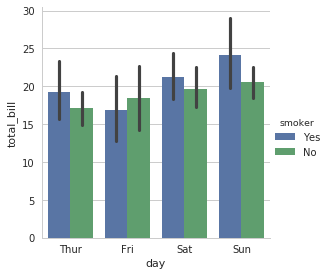

In [134]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

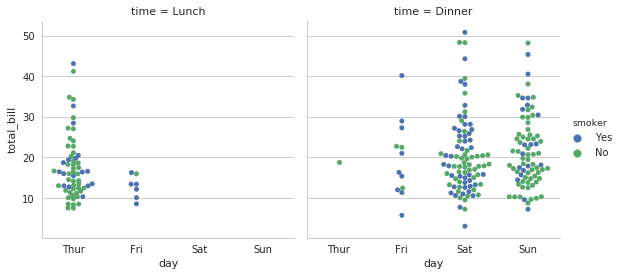

In [135]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

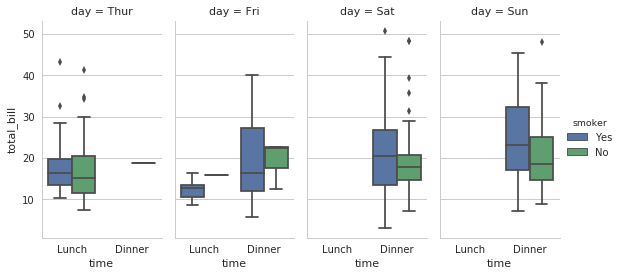

In [136]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

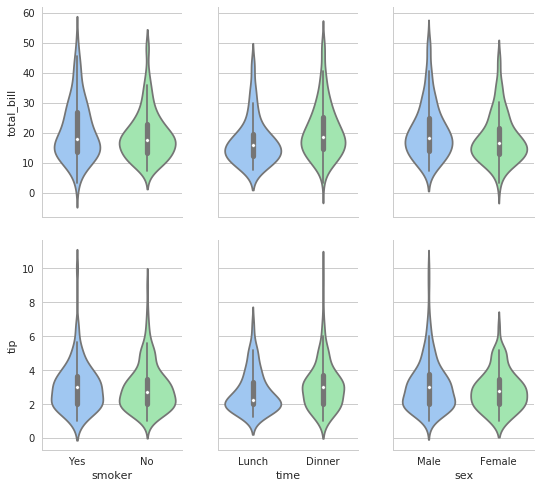

In [137]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");